# Why Jupyter Notebook ?

As most of the evaluation of model preformance will require human judging, It's better to experiment in Jupyter Notebook for now.

Of course metrics will be put into account, but I noticed with the inital experiment that the model generates white pixels "Background was white" everywhere so it decreases the loss. basically the model learnt to generate the background not the required task. it found it easier that way to decrease the loss :D
"There are specialized metrics for GANs but I'm not seeking to outpreforme the best GANs model, So no need to get into more complexity"

In [1]:
from Utils.model_builder.tf_models.model_02 import pix2pix 
import tensorflow as tf
module_name = "pix2pix"
from Utils.mlflow.mlflow import mlflow_track
from Utils.data_loader.load_images import load_x_y_images, load_x_images, load_test_image
import mlflow
from Utils.visualize_images.visualize_images import display_one_image
from Utils.config import load_config_file

In [2]:

config_file = load_config_file()

In [3]:
track_uri = config_file["mlflow"]["track_uri"]
data_version = config_file["data_versions"][-1] # -1 to get the latest only without having to hardcode it in here,
                                                # "Assuming that the last will always will be the updated one"
epochs = config_file["train_config"]["epochs"]
batch_size = config_file["train_config"]["batch_size"]
print(data_version)

3-10-22


In [4]:
metric = f"val_{config_file['train_config']['metric']}"
reduce_lr_pt = config_file["train_config"]["lr_reduce_pati"]
erl_stp_pt = config_file["train_config"]["earl_stop"]

In [5]:
'''from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
callbacks = []
callbacks.append(EarlyStopping(monitor=metric,patience=erl_stp_pt,
                verbose=1,restore_best_weights=True))
callbacks.append(ReduceLROnPlateau(monitor=metric,
                patience=reduce_lr_pt,verbose=1))'''

'from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau\ncallbacks = []\ncallbacks.append(EarlyStopping(monitor=metric,patience=erl_stp_pt,\n                verbose=1,restore_best_weights=True))\ncallbacks.append(ReduceLROnPlateau(monitor=metric,\n                patience=reduce_lr_pt,verbose=1))'

In [6]:
test_image = load_test_image("Data/4-09-22/test/WhatsApp Image 2022-09-24 at 4.44.56 PM (1).jpeg",(256,256))

In [7]:
mlflow.set_experiment("X_Y_images")

'mlflow.set_experiment("X_Y_images")'

In [8]:
dataset = load_x_y_images(data_version).shuffle(1000)

<MapDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None))>


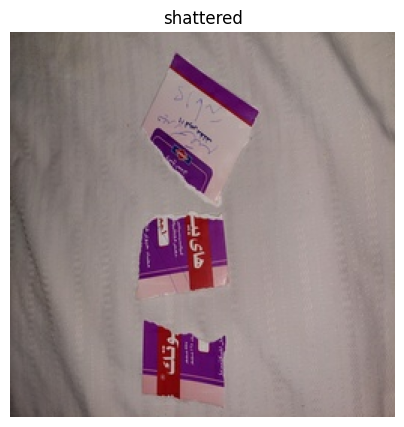

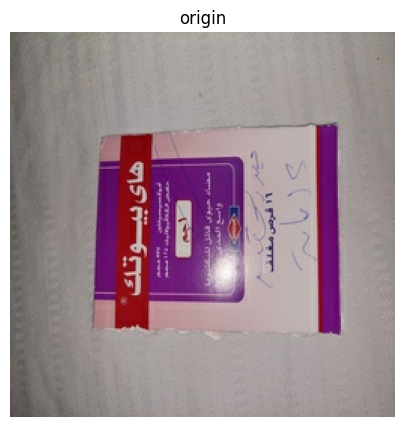

In [9]:
from Utils.data_loader.load_images import scale_pic 
sample = dataset.take(1).map(scale_pic) #If not scaled, matplotlib will clip it and ruin the pic
for x ,y in sample:
    display_one_image(x,"shattered")
    display_one_image(y,"origin")

In [10]:
dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [11]:
lr = config_file["train_config"]["learning_rate"]
model = pix2pix(learning_rate=lr)

In [12]:
#model.fit(dataset,epochs=3,test_image=test_image)

In [13]:
@mlflow_track
def exp_x_y_images(model,dataset=dataset,data_version=data_version):
    """I would like to try generating the same images so that the model can learn the feature of our dataset,
    then leverage this learning with our task"""
    mlflow.tensorflow.autolog()
    mlflow.log_param("Data Version", data_version)
    mlflow.log_param("Epochs", epochs)
    mlflow.log_param("reduce_lr", reduce_lr_pt)
    mlflow.log_param("earl_st",erl_stp_pt)

    lr = config_file["train_config"]["learning_rate"]
    loss = config_file["train_config"]["loss"]

    model = pix2pix(learning_rate=lr)
    mlflow.log_param("Model Module", f"{module_name},lyr_freezed_-1")
    model.fit(dataset,epochs=epochs,test_image=test_image)
    #mse = model.evalute(dataset)
    #mlflow.log_metric("mse", mse)
    #return model

In [1]:
exp_x_y_images(model)

'exp_x_y_images(model)'

In [ ]:
'''run_id = "970f3cfb98e94267a741a25c77ae71e0"
model = tf.keras.models.load_model(f"mlruns/2/{run_id}/artifacts/model/data/model")'''

1/1 [==============================] - 6s 6s/step


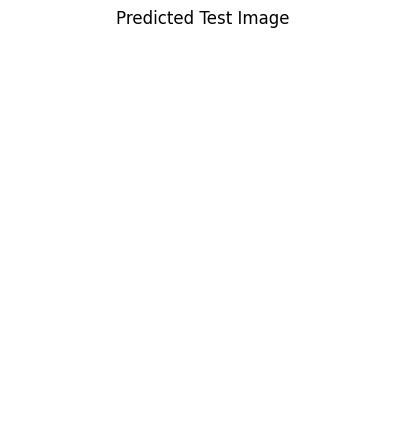

In [ ]:
pred_image = model.get_generator().predict(test_image)
display_one_image(pred_image,"Predicted Test Image")